[2 0 0 0 2 1 1 2 1 0 1 2 0 1 0 2 2 0 1 1 1 1 1 2 1 1 2 2 1 0 1 0 0 2 0 2 0
 2 2 2 2 2 0 0 2 2 1 0 1 1 2 0 0 0 2 1 0 0 1 1 0 1 1 2 1 1 1 1 0 2 0 1 1 2
 2 2 0 0 0 0 1 2 2 0 2 0 1 2 0 0 1 2 1 0 1 0 0 2 2 2]


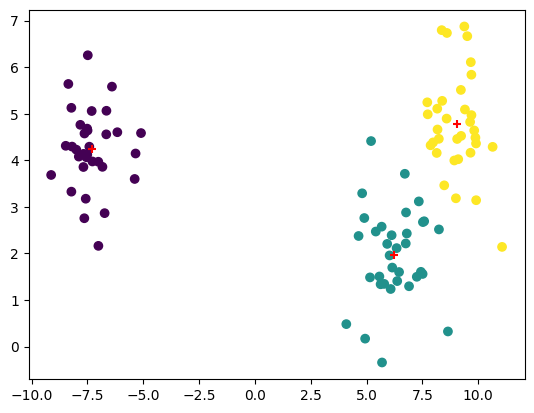

In [4]:
# Clustering: laisser la machine 
# classer les donnees selon leurs re semblances

# K-Means:
# 1- Affectation des points au centre le plus proche
# 2- Deplacement du centre vers la moyenne du cluster

# for centre in k_centres:
#  donnees=trouver_donnees_proches_a(centre)
#  deplacer_centre_vers_nouveau_centre(centre,donnees)
# le k-means cherche a minimser la fonction inertia:
# inertia = sum(min_j(||xi-centre_j||)**2)
#                |_>pour chaque point xi, on trouve la distance min des centres j
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,n_init=10,
               max_iter=250
               ,init='k-means++')
X,y = make_blobs(n_samples=100,centers=3,cluster_std=1)
print(y)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0],X[:,1],c = model.predict(X))
centers = model.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker='+',c='r')
# n_clusters: nombre de clusters que l'on veut
# n_init: nombre d'initialisation de premiers points
# au hasard
# max_iter: nombre d'iteration max justqu'a l'arrive 
# a la determination finale de clusters
# init: strategy de placement de points au hasard, par defaut: k-means++


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

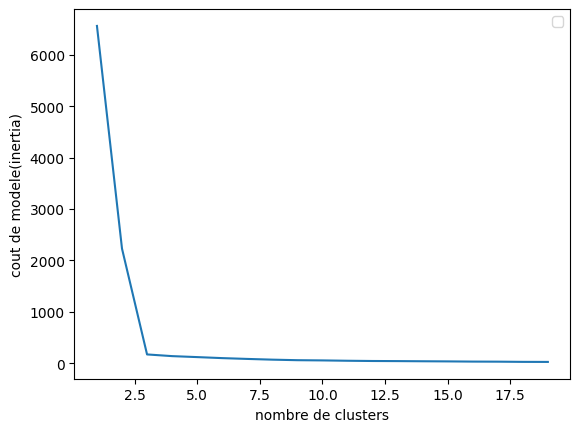

In [30]:
# comment peut on decider
# le nombre optimal de cluster
# dans un dataset quelconque donnee?
# solution: Elbow method,
# comme le learning curve,
# on va calculer l'inertia de modele
# pour un nombre de cluster i croissant
# et voir le elbow de modele
# rappelez-vous: le but de clustering est de minimiser la fonction d'inertia
inertia = []
k_range = range(1,20) # on essaie de trouver le nombre optimal entre [1, 20]
for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertia.append(model.inertia_)
plt.plot(k_range,inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('cout de modele(inertia)')
plt.legend()

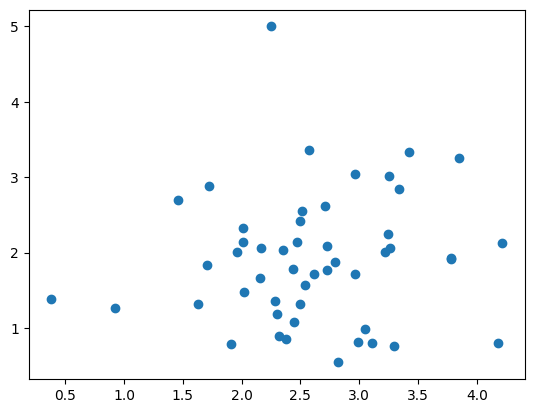

In [7]:
# TODO Voir plus AgglomerativeClustring, DBSCAN, SpectralClustering
# Detection d'anomalie:
# --------------------
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
X,y = make_blobs(n_samples=50,centers = 1,cluster_std=0.8)
X[-1,:] = np.array([2.25,5])
plt.scatter(X[:,0],X[:,1])


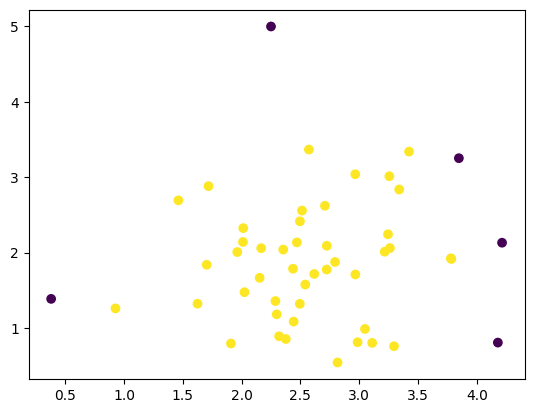

In [8]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.1)
# contamination: pourcentage de donnees
# qui vont etre filtrées,considérées comme 
# anomalie 
model.fit(X)
plt.scatter(X[:,0],X[:,1],c=model.predict(X))

Text(0.5, 1.0, '4')

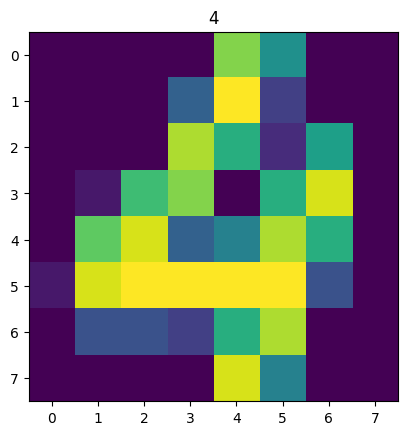

In [5]:
from sklearn.datasets import load_digits
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
digits = load_digits()
images = digits.images
X =digits.data
y = digits.target
plt.imshow(images[0])# ou bien: plt.imshow(X[0].reshape(8,8))
model = IsolationForest(contamination=0.02)
# X = X[y==0]
model.fit(X)
outliers = model.predict(X) == -1 # on va essaier de trouver les Xi qui sont contaminees
plt.imshow(X[outliers][35].reshape(8,8))
plt.title(y[outliers][35])
# TODO voir plus Local Outlier Factor
# novelty detection, trouver des anomalies dans
# les donnees de test

[0.14890594 0.13618771]


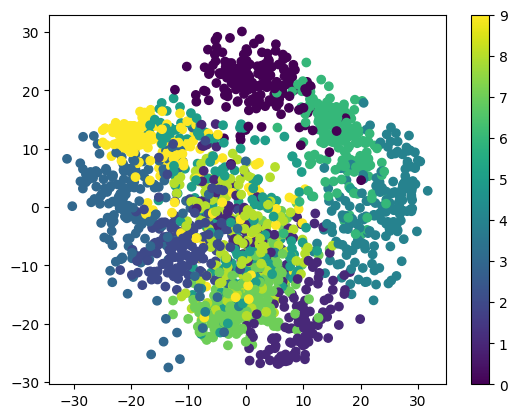

In [10]:
# Reduction de dimension

# 1-Pour la visualisation de donnees
from sklearn.decomposition import PCA
# X.shape= (1797,64)
model = PCA(n_components=2) # on veut garder que deux variables --LES PLUS IMPORTANTS--
X_reduced=model.fit_transform(X) # shape = (1797,2)
print(model.explained_variance_ratio_)
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y)
plt.colorbar()
# model.components_.shape = (2,64)
# c'est a dire chaque component est 
# un combinaison lineaire des 64 variables
# du dataset

Text(0, 0.5, 'Precision de donnees')

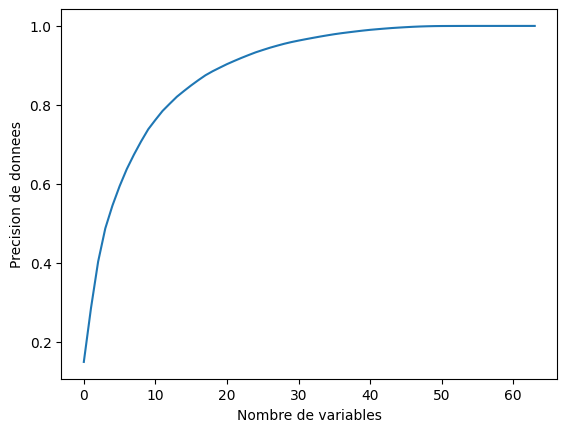

In [51]:
# 2- Pour la compression de donnees
model = PCA(n_components=64)
X_reduced = model.fit_transform(X)
model.explained_variance_ratio_ # voir le pourcentage
# de variance preserve pour chaque variable
# en general: on souhaite garder les donnees
# entre 95% et 99%..
pourcentages_cum = np.cumsum(model.explained_variance_ratio_)
plt.plot(pourcentages_cum)
plt.xlabel("Nombre de variables")
plt.ylabel("Precision de donnees")
# commentaire: on peut voir que :
# au voisinage de 40 variables
# la precision est de 95% 
# on peut donc reentrainer le modele
# juste pour 40 variables
# et garder 95% de variance initiale de dataset!!

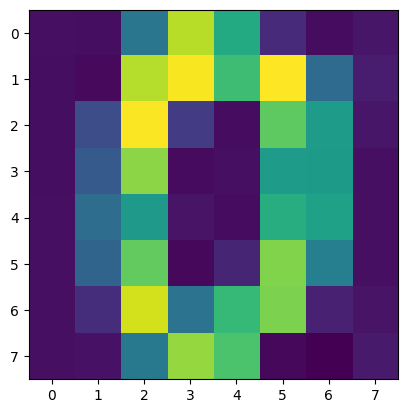

In [61]:
model = PCA(n_components=40)
X_reduced = model.fit_transform(X)

# pour voir les digits apres compression:
X_decomp = model.inverse_transform(X_reduced)
plt.imshow(X_decomp[0].reshape(8,8))